# Homework5 (Graphene)

## Problem1a t =-2.6

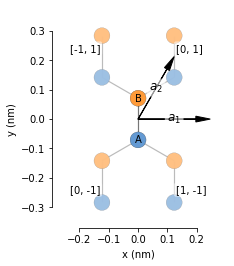

/home/jiaqian/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


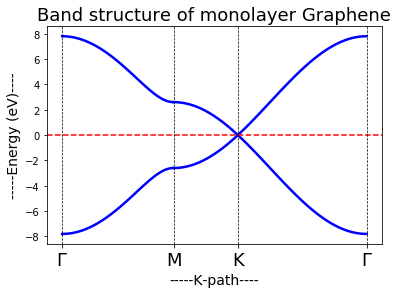

In [38]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.6      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

a1 = [a, 0]
a2 = [a/2, a*sqrt(3/2)]

Dim = 2 # Number of atoms in primitive cell
VA = 0
VB = 0
t = -2.6 #eV  -> nearest neighbor hopping term

wG2M1 = []
wG2M2 = []
kxG2M =[]

wM2K1 = []
wM2K2 = []
kxM2K = []

wK2G1 = []
wK2G2 = []
kxK2G = []

N = 100

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

b1 = [2*(np.pi)/a*np.sqrt(3), -2*(np.pi)/a]
b2 = [0, 2*(np.pi)/a*2]

R1 = [(a/np.sqrt(3)),0]
R2 = [(-a/(2*np.sqrt(3))),a/2]
R3 = [(-a/(2*np.sqrt(3))),-a/2]

H = np.zeros((Dim,Dim)) # Hamiltonian


Sym_pts = [[0,0],[0,b2[1]/2],[b2[1]/(6*np.sqrt(3)),b2[1]/2]]#igh symmetry points
#           G     M            K                                

Kx = np.linspace(-3*np.pi/(2*a),3*np.pi/(2*a),N)
Ky = np.linspace(-3*np.pi/(2*a),3*np.pi/(2*a),N)

kx1 = np.linspace(Sym_pts[0][0],Sym_pts[1][0], N)
ky1 = np.linspace(Sym_pts[0][1],Sym_pts[1][1], N)

kx2 = np.linspace(Sym_pts[1][0],Sym_pts[2][0], N)
ky2 = np.linspace(Sym_pts[1][1],Sym_pts[2][1], N)

kx3 = np.linspace(Sym_pts[2][0],Sym_pts[0][0], N)
ky3 = np.linspace(Sym_pts[2][1],Sym_pts[0][1], N)


r1 =  np.linspace(0,(2*np.pi/(np.sqrt(3)*a)),100)
r2 =  np.linspace((2*np.pi/(np.sqrt(3)*a)),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),100)
r3 =  np.linspace(((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(a))),100)

                                                             
def f(x,y):
    return (np.exp(1j*y*a)+np.exp(1j*y*a/2)*2*np.cos(x*np.sqrt(3)*a/2))



for i in range(len(kx1)):
        tAB = t*f(kx1[i],ky1[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wG2M1.append(w1[0])
        wG2M2.append(w1[1])

for i in range(len(kx2)):
        tAB = t*f(kx2[i],ky2[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wM2K1.append(w1[0])
        wM2K2.append(w1[1])

for i in range(len(kx3)):
        tAB = t*f(kx3[i],ky3[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wK2G1.append(w1[0])
        wK2G2.append(w1[1])
                      
        

for k in range(len(r1)):
        kxG2M.append(r1[k])
        kxM2K.append(r2[k])
        kxK2G.append(r3[k])
        
plt.plot(kxG2M,wG2M1,'-b', linewidth=2.5)
plt.plot(kxG2M,wG2M2,'-b', linewidth=2.5)
plt.plot(kxM2K,wM2K1,'-b', linewidth=2.5)
plt.plot(kxM2K,wM2K2,'-b', linewidth=2.5)
plt.plot(kxK2G,wK2G1,'-b', linewidth=2.5)
plt.plot(kxK2G,wK2G2,'-b', linewidth=2.5)
plt.axhline(y=0.0, color='r', linestyle='--', linewidth=1.5)
plt.xlabel('-----K-path----',fontsize=14)
plt.ylabel('-----Energy (eV)----',fontsize=14)
plt.title('Band structure of monolayer Graphene',fontsize=18)

x = np.array([0 , 1.4746336294587137  ,  2.32601375  ,  4.028774])
plt.axvline(x=0.0, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=1.4746336294587137, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=2.32601375, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=4.028774, color='k', linestyle='--', linewidth=0.7)

my_xticks = ['$\Gamma$','M','K','$\Gamma$']
plt.xticks(x, my_xticks,fontsize=18)


plt.show()

## Problem1b t =3.4

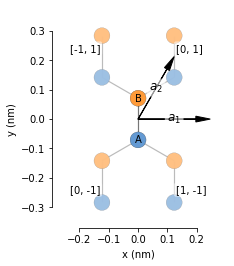

/home/jiaqian/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


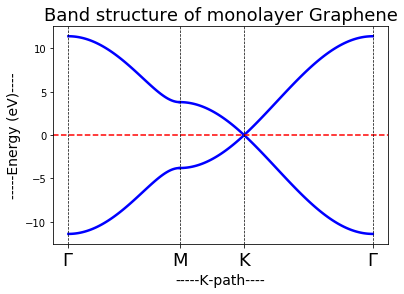

In [39]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.6      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

a1 = [a, 0]
a2 = [a/2, a*sqrt(3/2)]

Dim = 2 # Number of atoms in primitive cell
VA = 0
VB = 0
t = -3.8 #eV  -> nearest neighbor hopping term

wG2M1 = []
wG2M2 = []
kxG2M =[]

wM2K1 = []
wM2K2 = []
kxM2K = []

wK2G1 = []
wK2G2 = []
kxK2G = []

N = 100

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

b1 = [2*(np.pi)/a*np.sqrt(3), -2*(np.pi)/a]
b2 = [0, 2*(np.pi)/a*2]

R1 = [(a/np.sqrt(3)),0]
R2 = [(-a/(2*np.sqrt(3))),a/2]
R3 = [(-a/(2*np.sqrt(3))),-a/2]

H = np.zeros((Dim,Dim)) # Hamiltonian


Sym_pts = [[0,0],[0,b2[1]/2],[b2[1]/(6*np.sqrt(3)),b2[1]/2]]#igh symmetry points
#           G     M            K                                

Kx = np.linspace(-3*np.pi/(2*a),3*np.pi/(2*a),N)
Ky = np.linspace(-3*np.pi/(2*a),3*np.pi/(2*a),N)

kx1 = np.linspace(Sym_pts[0][0],Sym_pts[1][0], N)
ky1 = np.linspace(Sym_pts[0][1],Sym_pts[1][1], N)

kx2 = np.linspace(Sym_pts[1][0],Sym_pts[2][0], N)
ky2 = np.linspace(Sym_pts[1][1],Sym_pts[2][1], N)

kx3 = np.linspace(Sym_pts[2][0],Sym_pts[0][0], N)
ky3 = np.linspace(Sym_pts[2][1],Sym_pts[0][1], N)


r1 =  np.linspace(0,(2*np.pi/(np.sqrt(3)*a)),100)
r2 =  np.linspace((2*np.pi/(np.sqrt(3)*a)),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),100)
r3 =  np.linspace(((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(a))),100)

                                                             
def f(x,y):
    return (np.exp(1j*y*a)+np.exp(1j*y*a/2)*2*np.cos(x*np.sqrt(3)*a/2))



for i in range(len(kx1)):
        tAB = t*f(kx1[i],ky1[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wG2M1.append(w1[0])
        wG2M2.append(w1[1])

for i in range(len(kx2)):
        tAB = t*f(kx2[i],ky2[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wM2K1.append(w1[0])
        wM2K2.append(w1[1])

for i in range(len(kx3)):
        tAB = t*f(kx3[i],ky3[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wK2G1.append(w1[0])
        wK2G2.append(w1[1])
                      
        

for k in range(len(r1)):
        kxG2M.append(r1[k])
        kxM2K.append(r2[k])
        kxK2G.append(r3[k])
        
plt.plot(kxG2M,wG2M1,'-b', linewidth=2.5)
plt.plot(kxG2M,wG2M2,'-b', linewidth=2.5)
plt.plot(kxM2K,wM2K1,'-b', linewidth=2.5)
plt.plot(kxM2K,wM2K2,'-b', linewidth=2.5)
plt.plot(kxK2G,wK2G1,'-b', linewidth=2.5)
plt.plot(kxK2G,wK2G2,'-b', linewidth=2.5)
plt.axhline(y=0.0, color='r', linestyle='--', linewidth=1.5)
plt.xlabel('-----K-path----',fontsize=14)
plt.ylabel('-----Energy (eV)----',fontsize=14)
plt.title('Band structure of monolayer Graphene',fontsize=18)

x = np.array([0 , 1.4746336294587137  ,  2.32601375  ,  4.028774])
plt.axvline(x=0.0, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=1.4746336294587137, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=2.32601375, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=4.028774, color='k', linestyle='--', linewidth=0.7)

my_xticks = ['$\Gamma$','M','K','$\Gamma$']
plt.xticks(x, my_xticks,fontsize=18)


plt.show()

## Second nearest as t=0.2

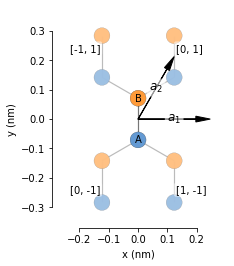

/home/jiaqian/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


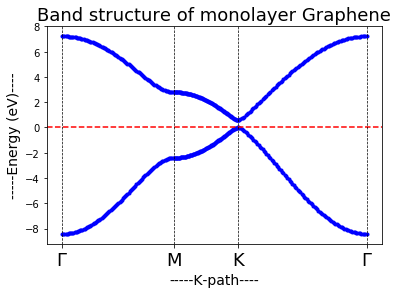

In [40]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.6      # [eV] nearest neighbour hopping
    t2 = -0.2

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

a1 = [a, 0]
a2 = [a/2, a*sqrt(3/2)]

Dim = 2 # Number of atoms in primitive cell
VA = 0
VB = 0
t = -2.6 #eV  -> nearest neighbor hopping term
t2 = -0.2

wG2M1 = []
wG2M2 = []
kxG2M =[]

wM2K1 = []
wM2K2 = []
kxM2K = []

wK2G1 = []
wK2G2 = []
kxK2G = []

N = 100

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

b1 = [2*(np.pi)/a*np.sqrt(3), -2*(np.pi)/a]
b2 = [0, 2*(np.pi)/a*2]

R1 = [(a/np.sqrt(3)),0]
R2 = [(-a/(2*np.sqrt(3))),a/2]
R3 = [(-a/(2*np.sqrt(3))),-a/2]

H = np.zeros((Dim,Dim)) # Hamiltonian


Sym_pts = [[0,0],[((2*np.pi)/(np.sqrt(3)*a)),0],[((2*np.pi)/(np.sqrt(3)*a)),((2*np.pi)/(3*a))],[0,0]]#High symmetry points
#           G                   M                              K                                G



kx1 = np.linspace(Sym_pts[0][0],Sym_pts[1][0], 100)
ky1 = np.linspace(Sym_pts[0][1],Sym_pts[1][1], 100)

kx2 = np.linspace(Sym_pts[1][0],Sym_pts[2][0], 100)
ky2 = np.linspace(Sym_pts[1][1],Sym_pts[2][1], 100)

kx3 = np.linspace(Sym_pts[2][0],Sym_pts[3][0], 100)
ky3 = np.linspace(Sym_pts[2][1],Sym_pts[3][1], 100)


r1 =  np.linspace(0,(2*np.pi/(np.sqrt(3)*a)),100)
r2 =  np.linspace((2*np.pi/(np.sqrt(3)*a)),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),100)
r3 =  np.linspace(((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(a))),100)


R1 = [(a/np.sqrt(3)),0]
R2 = [(-a/(2*np.sqrt(3))),a/2]
R3 = [(-a/(2*np.sqrt(3))),-a/2]

R21 = [0,a]
R22 = [0,-a]
R23 = [(np.sqrt(3)*a)/2,a/2]
R24 = [(np.sqrt(3)*a)/2,-a/2]
R25 = [(-np.sqrt(3)*a)/2,a/2]
R26 = [(-np.sqrt(3)*a)/2,-a/2]

                                                             
def f(R,x,y):
    return (np.exp(1j*np.dot([x,y],[R[0],R[1]])))

def gf(x,y):
    return (2*np.cos(y*a)+4*np.cos(x*np.sqrt(3)*a/2)*np.cos(y*a/2))


for i in range(len(kx1)):
        tAB = t*(f(R1,kx1[i],ky1[i])+f(R2,kx1[i],ky1[i])+f(R3,kx1[i],ky1[i]))
        tAA = VA+t2*g(kx1[i],ky1[i])
        
        H = [[tAA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
       # w1, v1 = LA.eig(H)
        wG2M1.append(w1[0])
        wG2M2.append(w1[1])

for i in range(len(kx2)):
        tAB = t*(f(R1,kx2[i],ky2[i])+f(R2,kx2[i],ky2[i])+f(R3,kx2[i],ky2[i]))
        tAA = VA+t2*gf(kx2[i],ky2[i])
        
        H = [[tAA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
       # w1, v1 = LA.eig(H)
        wM2K1.append(w1[0])
        wM2K2.append(w1[1])

for i in range(len(kx3)):
        tAB = t*(f(R1,kx3[i],ky3[i])+f(R2,kx3[i],ky3[i])+f(R3,kx3[i],ky3[i]))
        tAA = VA+t2*gf(kx3[i],ky3[i])
        
        H = [[tAA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
       # w1, v1 = LA.eig(H)
        wK2G1.append(w1[0])
        wK2G2.append(w1[1])
                      
        

for k in range(len(r1)):
        kxG2M.append(r1[k])
        kxM2K.append(r2[k])
        kxK2G.append(r3[k])
        
plt.plot(kxG2M,wG2M1,'.b', linewidth=2.5)
plt.plot(kxG2M,wG2M2,'.b', linewidth=2.5)
plt.plot(kxM2K,wM2K1,'.b', linewidth=2.5)
plt.plot(kxM2K,wM2K2,'.b', linewidth=2.5)
plt.plot(kxK2G,wK2G1,'.b', linewidth=2.5)
plt.plot(kxK2G,wK2G2,'.b', linewidth=2.5)
plt.axhline(y=0.0, color='r', linestyle='--', linewidth=1.5)
plt.xlabel('-----K-path----',fontsize=14)
plt.ylabel('-----Energy (eV)----',fontsize=14)
plt.title('Band structure of monolayer Graphene',fontsize=18)

x = np.array([0 , 1.4746336294587137  ,  2.32601375  ,  4.028774])
plt.axvline(x=0.0, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=1.4746336294587137, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=2.32601375, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=4.028774, color='k', linestyle='--', linewidth=0.7)

my_xticks = ['$\Gamma$','M','K','$\Gamma$']
plt.xticks(x, my_xticks,fontsize=18)


plt.show()

## Onsite energy VA=0.5,VB=-0.5

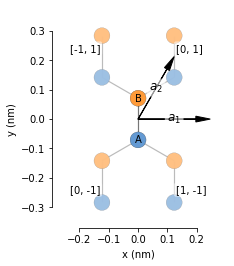

/home/jiaqian/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


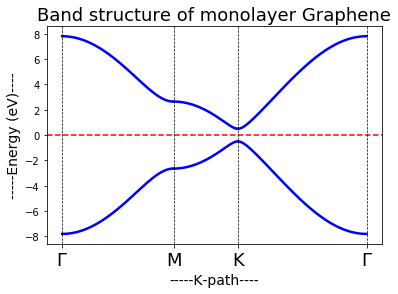

In [41]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.6      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

a1 = [a, 0]
a2 = [a/2, a*sqrt(3/2)]

Dim = 2 # Number of atoms in primitive cell
VA = -0.5
VB = 0.5
t = -2.6 #eV  -> nearest neighbor hopping term

wG2M1 = []
wG2M2 = []
kxG2M =[]

wM2K1 = []
wM2K2 = []
kxM2K = []

wK2G1 = []
wK2G2 = []
kxK2G = []

N = 100

a = 2.46 # Ao ->lattice parameter
acc =  a/np.sqrt(3) # bond-length

b1 = [2*(np.pi)/a*np.sqrt(3), -2*(np.pi)/a]
b2 = [0, 2*(np.pi)/a*2]

R1 = [(a/np.sqrt(3)),0]
R2 = [(-a/(2*np.sqrt(3))),a/2]
R3 = [(-a/(2*np.sqrt(3))),-a/2]

H = np.zeros((Dim,Dim)) # Hamiltonian


Sym_pts = [[0,0],[0,b2[1]/2],[b2[1]/(6*np.sqrt(3)),b2[1]/2]]#igh symmetry points
#           G     M            K                                

Kx = np.linspace(-3*np.pi/(2*a),3*np.pi/(2*a),N)
Ky = np.linspace(-3*np.pi/(2*a),3*np.pi/(2*a),N)

kx1 = np.linspace(Sym_pts[0][0],Sym_pts[1][0], N)
ky1 = np.linspace(Sym_pts[0][1],Sym_pts[1][1], N)

kx2 = np.linspace(Sym_pts[1][0],Sym_pts[2][0], N)
ky2 = np.linspace(Sym_pts[1][1],Sym_pts[2][1], N)

kx3 = np.linspace(Sym_pts[2][0],Sym_pts[0][0], N)
ky3 = np.linspace(Sym_pts[2][1],Sym_pts[0][1], N)


r1 =  np.linspace(0,(2*np.pi/(np.sqrt(3)*a)),100)
r2 =  np.linspace((2*np.pi/(np.sqrt(3)*a)),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),100)
r3 =  np.linspace(((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(3*a))),((2*np.pi/(np.sqrt(3)*a))+(2*np.pi/(a))),100)

                                                             
def f(x,y):
    return (np.exp(1j*y*a)+np.exp(1j*y*a/2)*2*np.cos(x*np.sqrt(3)*a/2))



for i in range(len(kx1)):
        tAB = t*f(kx1[i],ky1[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wG2M1.append(w1[0])
        wG2M2.append(w1[1])

for i in range(len(kx2)):
        tAB = t*f(kx2[i],ky2[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wM2K1.append(w1[0])
        wM2K2.append(w1[1])

for i in range(len(kx3)):
        tAB = t*f(kx3[i],ky3[i])
        H = [[VA,tAB],[np.conjugate(tAB),VB]]
        
        w1, v1 = LA.eig(H)
        wK2G1.append(w1[0])
        wK2G2.append(w1[1])
                      
        

for k in range(len(r1)):
        kxG2M.append(r1[k])
        kxM2K.append(r2[k])
        kxK2G.append(r3[k])
        
plt.plot(kxG2M,wG2M1,'-b', linewidth=2.5)
plt.plot(kxG2M,wG2M2,'-b', linewidth=2.5)
plt.plot(kxM2K,wM2K1,'-b', linewidth=2.5)
plt.plot(kxM2K,wM2K2,'-b', linewidth=2.5)
plt.plot(kxK2G,wK2G1,'-b', linewidth=2.5)
plt.plot(kxK2G,wK2G2,'-b', linewidth=2.5)
plt.axhline(y=0.0, color='r', linestyle='--', linewidth=1.5)
plt.xlabel('-----K-path----',fontsize=14)
plt.ylabel('-----Energy (eV)----',fontsize=14)
plt.title('Band structure of monolayer Graphene',fontsize=18)

x = np.array([0 , 1.4746336294587137  ,  2.32601375  ,  4.028774])
plt.axvline(x=0.0, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=1.4746336294587137, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=2.32601375, color='k', linestyle='--', linewidth=0.7)
plt.axvline(x=4.028774, color='k', linestyle='--', linewidth=0.7)

my_xticks = ['$\Gamma$','M','K','$\Gamma$']
plt.xticks(x, my_xticks,fontsize=18)


plt.show()

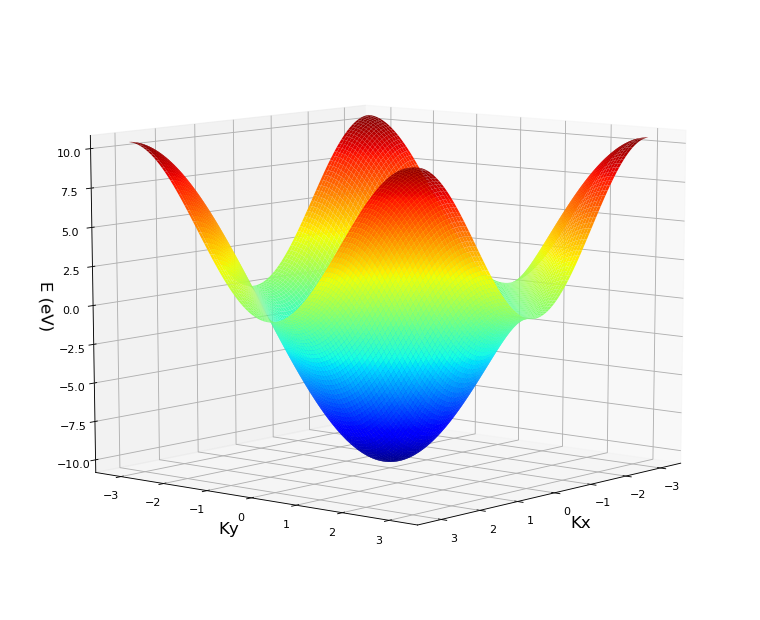

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab


Dim = 1 # Number of atoms in primitive cell
Eo = 0
VA  = 0
VB  = 0
t = -2.6 #eV  -> nearest neighbor hopping term

a = 1 # Ao ->lattice parameter

R1 = [a,0]
R2 = [0,a]
R3 = [-a,0]
R4 = [0,-a]

N = 100
Kx = np.linspace(-np.pi/(a),np.pi/(a),N)
Ky = np.linspace(-np.pi/(a),np.pi/(a),N)

H = np.zeros((1,1)) # Hamiltonian

def f(x,y):
    return (np.exp(1j*y*a)+np.exp(1j*y*a/2)*2*np.cos(x*np.sqrt(3)*a/2))

def Ham(Kx,Ky):
    #tAB = np.exp(1j*Ky*a)+np.exp(1j*Ky*a/2)*2*np.cos(Kx*np.sqrt(3)*a/2)
    #H = (VA+VB)/2+np.sqrt((VA-VB)*(VA-VB)+4*tAB*np.conjugate(tAB))/2  #why it still cant be use here
    tAB = 2*t*(np.cos(Kx*a)+np.cos(Ky*a))
    H = Eo+tAB
    return H

#def Ham2(Kx,Ky):
#    tAB = t*(f(R1,Kx,Ky)+f(R2,Kx,Ky)+f(R3,Kx,Ky))
#    H = [[VA,tAB],[np.conjugate(tAB),VB]]
#    E2 = (VA+VB)/2-np.sqrt((VA-VB)^2+4*tAB*np.conjugate(tAB))/2
#    return E2



fig = plt.figure(figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

[X, Y] = np.meshgrid(Kx, Ky)
Z = Ham(X, Y)
#2 = Ham2(X, Y)


surf = ax.plot_surface(X,Y,Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
#ax.set_zlim3d(0, Z.max())
ax.view_init(elev=10., azim = 40)
ax.set_xlabel('Kx',fontsize=15)
ax.set_ylabel('Ky',fontsize=15)
ax.set_zlabel('E (eV)',fontsize=15)
plt.show()
plt.show()        
    


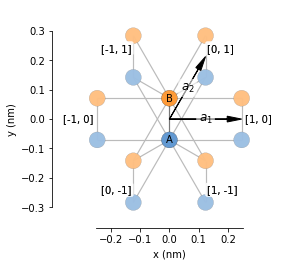

In [43]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi


# System parameters
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.6      # [eV] nearest neighbour hopping
t2 = 0.2

# Reciprocal lattice symmetry points
Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc), 0]
M  = [0, 2*pi / (3*a_cc)]
K2 = [2*pi / (3*sqrt(3)*a_cc), 2*pi / (3*a_cc)]

def monolayer_graphene(onsite_energy=[0, 0]):
    lat = pb.Lattice(a1=[a, 0], a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2], onsite_energy[0]),
                        ('B', [0,  a_cc/2], onsite_energy[1]))
    lat.add_hoppings(([0,  0], 'A', 'B', t),
                     ([1, -1], 'A', 'B', t),
                     ([0, -1], 'A', 'B', t),
                     ([0,  1], 'A', 'A', t2),
                     ([1,  0], 'A', 'A', t2),
                     ([1, -1], 'A', 'A', t2),
                     ([0,  1], 'B', 'B', t2),
                     ([1,  0], 'B', 'B', t2),
                     ([1, -1], 'B', 'B', t2),
                    )
    return lat

lattice = monolayer_graphene()
lattice.plot()



Text(0, 0.5, '-----Energy (eV)----')

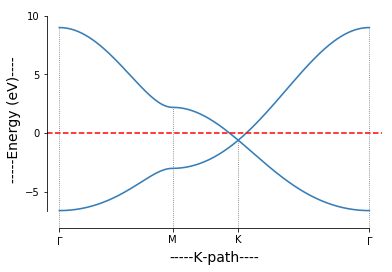

In [44]:
model = pb.Model(
    monolayer_graphene(),  # eV
    pb.translational_symmetry()
)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(Gamma, M, K2,Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])

plt.axhline(y=0.0, color='r', linestyle='--', linewidth=1.5)
plt.xlabel('-----K-path----',fontsize=14)
plt.ylabel('-----Energy (eV)----',fontsize=14)

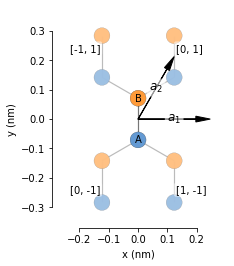

In [45]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi


# System parameters
a = 0.24595   # [nm] unit cell length
a_cc = 0.142  # [nm] carbon-carbon distance
t = -2.6      # [eV] nearest neighbour hopping
t2 = 0.2

# Reciprocal lattice symmetry points
Gamma = [0, 0]
K1 = [-4*pi / (3*sqrt(3)*a_cc), 0]
M  = [0, 2*pi / (3*a_cc)]
K2 = [2*pi / (3*sqrt(3)*a_cc), 2*pi / (3*a_cc)]

def monolayer_graphene(onsite_energy=[0, 0]):
    lat = pb.Lattice(a1=[a, 0], a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2], onsite_energy[0]),
                        ('B', [0,  a_cc/2], onsite_energy[1]))
    lat.add_hoppings(([0,  0], 'A', 'B', t),
                     ([1, -1], 'A', 'B', t),
                     ([0, -1], 'A', 'B', t),
#                     ([0,  1], 'A', 'A', t2),
 #                    ([1,  0], 'A', 'A', t2),
  #                   ([1, -1], 'A', 'A', t2),
   #                  ([0,  1], 'B', 'B', t2),
    #                 ([1,  0], 'B', 'B', t2),
     #                ([1, -1], 'B', 'B', t2),
                    )
    return lat

lattice = monolayer_graphene()
lattice.plot()


Text(0, 0.5, '-----Energy (eV)----')

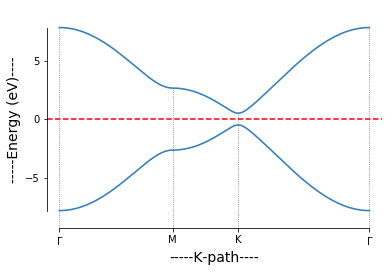

In [46]:
model = pb.Model(
    monolayer_graphene(onsite_energy=[-0.5, 0.5]),  # eV
    pb.translational_symmetry()
)
solver = pb.solver.lapack(model)
bands = solver.calc_bands(Gamma, M, K2,Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'M', 'K',r'$\Gamma$'])

plt.axhline(y=0.0, color='r', linestyle='--', linewidth=1.5)
plt.xlabel('-----K-path----',fontsize=14)
plt.ylabel('-----Energy (eV)----',fontsize=14)